In [15]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
import gc
import warnings
from datetime import datetime

# 1.源数据的读取

In [16]:
# df_origin = pd.read_csv('../UserBehavior.csv')

# 2.源数据补全列名，打印信息

In [17]:
# df_origin.columns = ['UserID', 'ItemID', 'CatogoryID', 'BehaviorType', 'TimeStamps']
# df_origin.info()

# 3.取百分之一用户的数据便于后续分析

In [18]:

# df_Second = df_origin.dropna()
# df_Second = df_Second.drop_duplicates(subset=['UserID', 'ItemID', 'TimeStamps'])
# # select 1/100 user data
# df_Second = df_Second[df_Second['UserID'] % 100 == 0]
# df_Second.to_csv('../UserBehavior-2.csv')


# 4.提高时间信息的可读性

In [19]:
df_Second = pd.read_csv('../UserBehavior-2.csv')
startTime = time.mktime(time.strptime("2017-11-25 00:00:00", "%Y-%m-%d %H:%M:%S"))
endTime = time.mktime(time.strptime("2017-12-3 23:59:59", "%Y-%m-%d %H:%M:%S"))
df_Second = df_Second.loc[(df_Second['TimeStamps'] >= startTime) & (df_Second['TimeStamps'] <= endTime)]


df_Second["time"] = df_Second["TimeStamps"].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df_Second['weekday'] = pd.to_datetime(df_Second['time'], format="%Y-%m-%d %H:%M:%S").dt.day_name()
df_Second['date'] = df_Second['time'].str[0:10]
df_Second['date'] = pd.to_datetime(df_Second['date'], format='%Y-%m-%d')
df_Second['time'] = df_Second['time'].str[11:13]
df_Second['time'] = df_Second['time'].astype(int)
df_Second['hour'] = pd.cut(df_Second['time'], bins=[-1, 5, 10, 13, 18, 24], labels=['morning', 'forenoon', 'noon', 'afternoon', 'night'])
df_Second = df_Second.drop(columns=['time'])

df_Second.head()

,Unnamed: 0,UserID,ItemID,CatogoryID,BehaviorType,TimeStamps,weekday,date,hour
0,2708530,205131,2664389,1320293,pv,1511795351,Monday,2017-11-27,night
1,15830413,808910,2619425,2355072,pv,1511680205,Sunday,2017-11-26,afternoon
2,18307222,92422,5062111,3138705,pv,1511645947,Sunday,2017-11-26,morning
3,78006593,901476,1632442,2013232,pv,1511715532,Monday,2017-11-27,morning
4,89157934,49272,2371018,3184456,pv,1512281047,Sunday,2017-12-03,afternoon


# 5.数据验证

In [20]:
print(df_Second.duplicated().any())
print(df_Second.isnull().any())
print(df_Second.date.min())
print(df_Second.date.max())

False
Unnamed: 0      False
UserID          False
ItemID          False
CatogoryID      False
BehaviorType    False
TimeStamps      False
weekday         False
date            False
hour            False
dtype: bool
2017-11-25 00:00:00
2017-12-03 00:00:00


BehaviorType
buy      3.356369
cart     8.762414
fav      4.418669
pv      83.462548
Name: UserID, dtype: float64

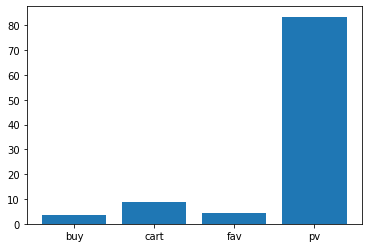

In [21]:
bt_persent = df_Second.groupby(by='BehaviorType')['UserID'].nunique() / df_Second.groupby(by='BehaviorType')['UserID'].nunique().sum()*100
plt.bar(bt_persent.index,bt_persent.values)
bt_persent

# 6.用户行为分析

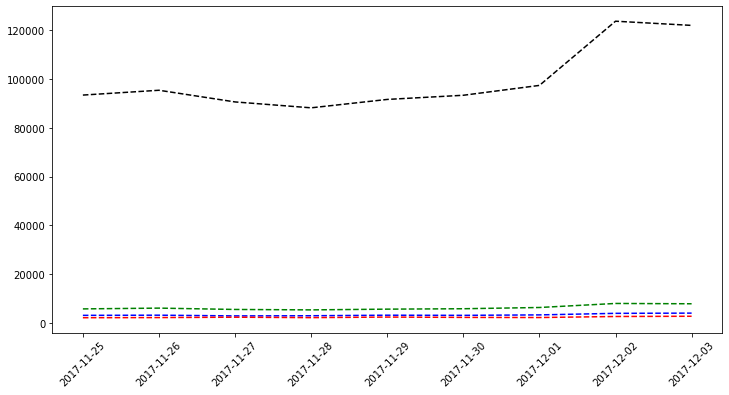

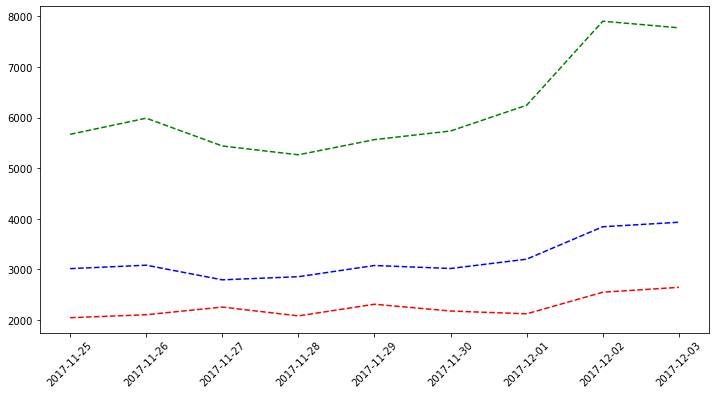

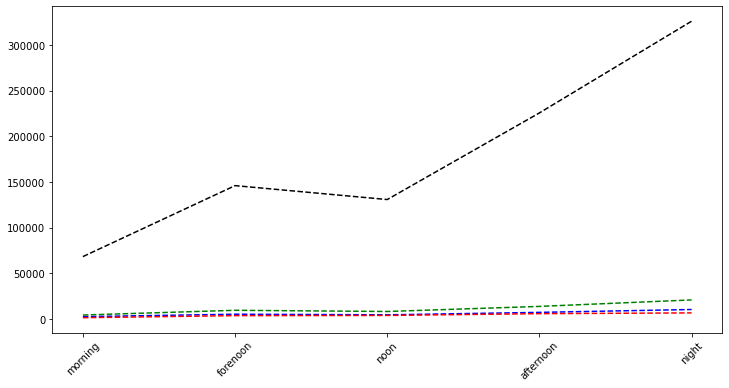

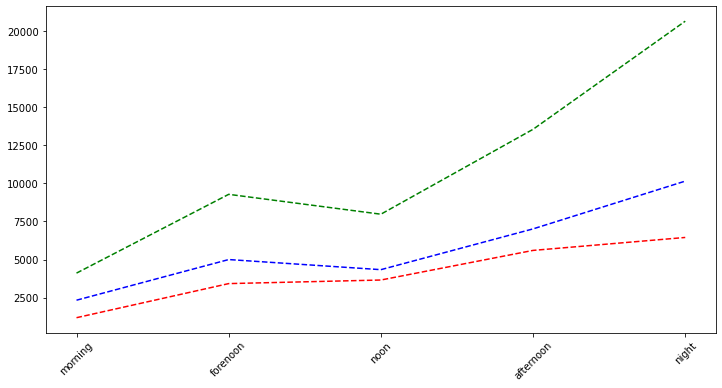

,UserID,MostPvCatogory,MostFavCatogory,MostCartCatogory,MostBuyCatogory
0,205131,1320293,NaN,NaN,NaN
1,808910,2355072,NaN,NaN,NaN
2,92422,2735466,NaN,NaN,NaN
3,901476,"48094,269606,982926,1609851,2013232,3795340,41...",NaN,NaN,NaN
4,49272,3091480,NaN,NaN,NaN


In [22]:
#把用户行为根据天数分割
day_pv_count = df_Second[df_Second['BehaviorType']=='pv'].groupby(by='date').count()
day_fav_count = df_Second[df_Second['BehaviorType']=='fav'].groupby(by='date').count()
day_cart_count = df_Second[df_Second['BehaviorType']=='cart'].groupby(by='date').count()
day_buy_count = df_Second[df_Second['BehaviorType']=='buy'].groupby(by='date').count()

plt.figure(figsize=(12,6))
plt.plot(list(day_pv_count['BehaviorType'].index),list(day_pv_count['BehaviorType'].values),linestyle='--',color='black')
plt.plot(list(day_fav_count['BehaviorType'].index),list(day_fav_count['BehaviorType'].values),linestyle='--',color='blue')
plt.plot(list(day_cart_count['BehaviorType'].index),list(day_cart_count['BehaviorType'].values),linestyle='--',color='green')
plt.plot(list(day_buy_count['BehaviorType'].index),list(day_buy_count['BehaviorType'].values),linestyle='--',color='red')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(list(day_fav_count['BehaviorType'].index),list(day_fav_count['BehaviorType'].values),linestyle='--',color='blue')
plt.plot(list(day_cart_count['BehaviorType'].index),list(day_cart_count['BehaviorType'].values),linestyle='--',color='green')
plt.plot(list(day_buy_count['BehaviorType'].index),list(day_buy_count['BehaviorType'].values),linestyle='--',color='red')
plt.xticks(rotation=45)
plt.show()
#把用户行为根据时间分割，第二张图不包括点击量的数据
day_pv_count = df_Second[df_Second['BehaviorType']=='pv'].groupby(by='hour').count()
day_fav_count = df_Second[df_Second['BehaviorType']=='fav'].groupby(by='hour').count()
day_cart_count = df_Second[df_Second['BehaviorType']=='cart'].groupby(by='hour').count()
day_buy_count = df_Second[df_Second['BehaviorType']=='buy'].groupby(by='hour').count()

plt.figure(figsize=(12,6))
plt.plot(list(day_pv_count['BehaviorType'].index),list(day_pv_count['BehaviorType'].values),linestyle='--',color='black')
plt.plot(list(day_fav_count['BehaviorType'].index),list(day_fav_count['BehaviorType'].values),linestyle='--',color='blue')
plt.plot(list(day_cart_count['BehaviorType'].index),list(day_cart_count['BehaviorType'].values),linestyle='--',color='green')
plt.plot(list(day_buy_count['BehaviorType'].index),list(day_buy_count['BehaviorType'].values),linestyle='--',color='red')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(list(day_fav_count['BehaviorType'].index),list(day_fav_count['BehaviorType'].values),linestyle='--',color='blue')
plt.plot(list(day_cart_count['BehaviorType'].index),list(day_cart_count['BehaviorType'].values),linestyle='--',color='green')
plt.plot(list(day_buy_count['BehaviorType'].index),list(day_buy_count['BehaviorType'].values),linestyle='--',color='red')
plt.xticks(rotation=45)
plt.show()
#提取每个用户的浏览，收藏，加购物车，购买数据，第二张图不包括浏览的数据

df_user = df_Second['UserID'].drop_duplicates()
df_pv = df_Second.loc[df_Second['BehaviorType']=='pv',['UserID','ItemID', 'CatogoryID']]
df_fav = df_Second.loc[df_Second['BehaviorType']=='fav',['UserID','ItemID', 'CatogoryID']]
df_cart = df_Second.loc[df_Second['BehaviorType']=='cart',['UserID','ItemID', 'CatogoryID']]
df_buy = df_Second.loc[df_Second['BehaviorType']=='buy',['UserID','ItemID', 'CatogoryID']]
#把每个用户最多浏览的商品类数据整理出来

df_pv_count = df_pv.groupby(['UserID','CatogoryID']).ItemID.count().reset_index()
df_pv_count.rename(columns={'ItemID':'CatogoryCounts'},inplace=True)
df_pv_max = df_pv_count.groupby('UserID').CatogoryCounts.max().reset_index()
df_pv_max.rename(columns={'CatogoryCounts':'FavoriteCatogory'},inplace=True)
df_pv_count= pd.merge(df_pv_count,df_pv_max,how='left',on='UserID')
df_pv_count['CatogoryID']=df_pv_count['CatogoryID'].astype(str)
df_pv = df_pv_count.loc[df_pv_count['CatogoryCounts']==df_pv_count['FavoriteCatogory'],'CatogoryID'].groupby(df_pv_count['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,df_pv,how='left',on='UserID')
df_user.rename(columns={'CatogoryID':'MostPvCatogory'},inplace=True)
#把每个用户最多加购物车的商品类数据整理出来

df_fav_count = df_fav.groupby(['UserID','CatogoryID']).ItemID.count().reset_index()
df_fav_count.rename(columns={'ItemID':'CatogoryCounts'},inplace=True)
df_fav_max = df_fav_count.groupby('UserID').CatogoryCounts.max().reset_index()
df_fav_max.rename(columns={'CatogoryCounts':'FavoriteCatogory'},inplace=True)
df_fav_count= pd.merge(df_fav_count,df_fav_max,how='left',on='UserID')
df_fav_count['CatogoryID']=df_fav_count['CatogoryID'].astype(str)
df_fav = df_fav_count.loc[df_fav_count['CatogoryCounts']==df_fav_count['FavoriteCatogory'],'CatogoryID'].groupby(df_fav_count['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,df_fav,how='left',on='UserID')
df_user.rename(columns={'CatogoryID':'MostFavCatogory'},inplace=True)
#把每个用户最多收藏的商品类数据整理出来

df_cart_count = df_cart.groupby(['UserID','CatogoryID']).ItemID.count().reset_index()
df_cart_count.rename(columns={'ItemID':'CatogoryCounts'},inplace=True)
df_cart_max = df_cart_count.groupby('UserID').CatogoryCounts.max().reset_index()
df_cart_max.rename(columns={'CatogoryCounts':'FavoriteCatogory'},inplace=True)
df_cart_count= pd.merge(df_cart_count,df_cart_max,how='left',on='UserID')
df_cart_count['CatogoryID']=df_cart_count['CatogoryID'].astype(str)
df_cart = df_cart_count.loc[df_cart_count['CatogoryCounts']==df_cart_count['FavoriteCatogory'],'CatogoryID'].groupby(df_cart_count['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,df_cart,how='left',on='UserID')
df_user.rename(columns={'CatogoryID':'MostCartCatogory'},inplace=True)
#把每个用户最多购买的商品类数据整理出来

df_buy_count = df_buy.groupby(['UserID','CatogoryID']).ItemID.count().reset_index()
df_buy_count.rename(columns={'ItemID':'CatogoryCounts'},inplace=True)
df_buy_max = df_buy_count.groupby('UserID').CatogoryCounts.max().reset_index()
df_buy_max.rename(columns={'CatogoryCounts':'FavoriteCatogory'},inplace=True)
df_buy_count= pd.merge(df_buy_count,df_buy_max,how='left',on='UserID')
df_buy_count['CatogoryID']=df_buy_count['CatogoryID'].astype(str)
df_buy = df_buy_count.loc[df_buy_count['CatogoryCounts']==df_buy_count['FavoriteCatogory'],'CatogoryID'].groupby(df_buy_count['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,df_buy,how='left',on='UserID')
df_user.rename(columns={'CatogoryID':'MostBuyCatogory'},inplace=True)
df_user.fillna(0)
#填充空值为0
df_user.head()

# 7.用户总体推荐

In [23]:
def R(t):
    if t in [0,1,2]:
        return 4
    elif t in [3,4]:
        return 3
    elif t in [5,6]:
        return 2
    else:
        return 1

def F(n):
    if n == 1:
        return 1
    elif n == 2:
        return 2
    elif n == 3:
        return 3
    else:
        return 4

df_buy_1 = df_Second[df_Second['BehaviorType']=='buy']
Near_buy_tstamp = df_buy_1.groupby(by='UserID')['TimeStamps'].max() #得出用户最近购买时间
df_buy_1 = pd.DataFrame(data=Near_buy_tstamp)
diff_time = (endTime - Near_buy_tstamp).astype('int') #用户最近购买时间距离结束时间长短
diff_day = (diff_time/(24*60*60)).astype('int')
df_Second['diffDay'] = diff_day
df_Second['R'] = df_Second['diffDay'].apply(R)
df_Second.drop(labels=['diffDay'],axis=1,inplace=True)


df_Second['Frequency'] = df_Second['UserID'].value_counts().astype('int')
df_Second['F'] = df_Second['Frequency'].apply(F)
df_Second.drop(labels=['Frequency'],axis=1,inplace=True)


df_Second['UserCategory'] = np.select([(df_Second['R']>2.75)&(df_Second['F']>1.02),(df_Second['R']>2.75)&(df_Second['F']<=1.02),
          (df_Second['R']<=2.75)&(df_Second['F']>1.02),(df_Second['R']<2.75)&(df_Second['F']<=1.02)],
         ['重要价值用户','重要保持用户','重要发展用户','一般价值用户'])

df_user_level = df_Second[['UserID', 'UserCategory']].drop_duplicates(subset=['UserID'])

df_user = pd.merge(df_user,df_user_level,how='left',on='UserID')
df_user.head()



,UserID,MostPvCatogory,MostFavCatogory,MostCartCatogory,MostBuyCatogory,UserCategory
0,205131,1320293,NaN,NaN,NaN,重要发展用户
1,808910,2355072,NaN,NaN,NaN,重要发展用户
2,92422,2735466,NaN,NaN,NaN,重要发展用户
3,901476,"48094,269606,982926,1609851,2013232,3795340,41...",NaN,NaN,NaN,一般价值用户
4,49272,3091480,NaN,NaN,NaN,重要发展用户


# 8.用户操作时间差分析

In [24]:
# find the avarage time to buy items from cart to buy
df_pv = df_Second.loc[df_Second['BehaviorType']=='pv',['UserID','ItemID','TimeStamps']]
df_fav = df_Second.loc[df_Second['BehaviorType']=='fav',['UserID','ItemID','TimeStamps']]
df_cart = df_Second.loc[df_Second['BehaviorType']=='cart',['UserID','ItemID','TimeStamps']]
df_buy = df_Second.loc[df_Second['BehaviorType']=='buy',['UserID','ItemID','TimeStamps']]

buy_cart=pd.merge(df_cart,df_buy,how='inner',on=['UserID','ItemID'],suffixes=('_cart','_buy'))
buy_cart["time"]=buy_cart["TimeStamps_buy"]-buy_cart["TimeStamps_cart"]

buy_cart_time = buy_cart.loc[buy_cart['time']>0,'time'].mean()
print("所有商品从加入购物车到被买下的平均时间",int(buy_cart_time),"s")


所有商品从加入购物车到被买下的平均时间 97439 s


In [25]:
# find the avarage time to buy items from pv to buy
df_pv = df_Second.loc[df_Second['BehaviorType']=='pv',['UserID','ItemID','TimeStamps']]
df_fav = df_Second.loc[df_Second['BehaviorType']=='fav',['UserID','ItemID','TimeStamps']]
df_cart = df_Second.loc[df_Second['BehaviorType']=='cart',['UserID','ItemID','TimeStamps']]
df_buy = df_Second.loc[df_Second['BehaviorType']=='buy',['UserID','ItemID','TimeStamps']]

df_pv=df_pv.groupby(['UserID','ItemID']).TimeStamps.min().reset_index().rename(columns={'TimeStamps':'TimeStamps'})
buy_pv=pd.merge(df_pv,df_buy,how='inner',on=['UserID','ItemID'],suffixes=('_pv','_buy'))
buy_pv["time"]=buy_pv["TimeStamps_buy"]-buy_pv["TimeStamps_pv"]
buy_pv_time = buy_pv.loc[buy_pv['time']>0,'time'].mean()
print("所有商品从第一次浏览到被买下的平均时间",int(buy_pv_time),"s")


所有商品从第一次浏览到被买下的平均时间 64134 s


# 9.用户活跃时间段分析

In [57]:
## 购买时间段
time_buy = df_Second[df_Second['BehaviorType']=='buy'].groupby(['UserID','hour']).ItemID.count().reset_index()
time_buy.rename(columns={'ItemID':'hour_counts'},inplace=True)
time_buy_max = time_buy.groupby('UserID').hour_counts.max().reset_index()
time_buy_max.rename(columns={'hour_counts':'buy_counts_max'},inplace=True)
time_buy = pd.merge(time_buy,time_buy_max,how='left',on='UserID')
time_buy_hour = time_buy.loc[time_buy['hour_counts']==time_buy['buy_counts_max'],['hour','UserID']].groupby(time_buy['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,time_buy_hour,how = 'left',on='UserID')
df_user.rename(columns={'hour':'timeBuy'},inplace=True)

## 购买周几
week_buy=df_Second[df_Second['BehaviorType']=='buy'].groupby(['UserID','weekday']).ItemID.count().reset_index()
week_buy.rename(columns={'ItemID':'week_counts'},inplace=True)
week_buy_max = week_buy.groupby('UserID').week_counts.max().reset_index()
week_buy_max.rename(columns={'week_counts':'week_counts_max'},inplace=True)
week_buy = pd.merge(week_buy,week_buy_max,how='left',on='UserID')
week_buy['weekday']=week_buy['weekday'].astype(str)
week_buy_date=week_buy.loc[week_buy['week_counts']==week_buy['week_counts_max'],'weekday'].groupby(week_buy['UserID']).aggregate(lambda x:','.join(x)).reset_index()
week_buy_date.head()
df_user = pd.merge(df_user,week_buy_date,how = 'left',on='UserID')
df_user.rename(columns={'weekday':'weekBuy'},inplace=True)

## 浏览时间段
time_browser = df_Second[df_Second['BehaviorType']=='pv'].groupby(['UserID','hour']).ItemID.count().reset_index()
time_browser.rename(columns={'ItemID':'hour_counts'},inplace=True)
time_browser_max = time_browser.groupby('UserID').hour_counts.max().reset_index()
time_browser_max.rename(columns={'hour_counts':'browser_counts_max'},inplace=True)
time_browser = pd.merge(time_browser,time_browser_max,how='left',on='UserID')
time_browser_hour = time_browser.loc[time_browser['hour_counts']==time_browser['browser_counts_max'],['hour','UserID']].groupby(time_browser['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,time_browser_hour,how = 'left',on='UserID')
df_user.rename(columns={'hour':'timebrowser'},inplace=True)
time_browser_hour.head()
time_buy_hour.head()
## 购买周几
week_browser=df_Second[df_Second['BehaviorType']=='pv'].groupby(['UserID','weekday']).ItemID.count().reset_index()
week_browser.rename(columns={'ItemID':'week_counts'},inplace=True)
week_browser_max = week_browser.groupby('UserID').week_counts.max().reset_index()
week_browser_max.rename(columns={'week_counts':'week_counts_max'},inplace=True)
week_browser = pd.merge(week_browser,week_browser_max,how='left',on='UserID')
week_browser['weekday']=week_browser['weekday'].astype(str)
week_browser_date=week_browser.loc[week_browser['week_counts']==week_browser['week_counts_max'],'weekday'].groupby(week_browser['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,week_browser_date,how = 'left',on='UserID')
df_user.rename(columns={'weekday':'weekbrowser'},inplace=True)



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


# 10 TODO:
近七天用户行为分析
上次活跃间隔
购买间隔

👆 活跃度

复购指数
单一品类购买
购买/浏览， 购物车/浏览比重

👆 用户类型

更细致的RFM分组

以上是用户的分类
可选：
商品的筛选：
商品复购率
商品购买/浏览总数
商品的浏览与加购 购买比例（转化率） 

最后思路：针对用户构造用户的标签表，推荐商品可以根据其活跃时间，偏好商品种类等进行推荐。
根据用户活跃度和活跃类型推荐相应种类的货物
同时也对货物进行分类，筛选出 热门货物/复购率高的货物/转换率高的货物  作为推荐商品的补充。